In [1]:
import pandas as pd
import numpy as np
from itertools import product
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
model_dir = "feature_combo_models"

In [25]:
def get_table():
    feat_lst = os.listdir(model_dir)
    metrics = {"feature_combo":[]}
    for f in feat_lst:
        if not os.path.exists(os.path.join(model_dir,f,"SVC","report.json")):
            continue
        file = f
        with open(os.path.join(model_dir,f,"SVC","report.json"),"r") as f:
            data = json.load(f)
        
        for k in data.keys():
            try:
                metrics[k].append(data[k])
            except KeyError:
                metrics[k] = [data[k]]
        metrics["feature_combo"].append(file)
                    
    metric_df = pd.DataFrame.from_dict(metrics,orient="columns")
    return metric_df,metrics

table,metrics = get_table()
table

,feature_combo,accuracy,sensitivity,specificity,precision,f1
0,AAC-DPC-RScharge,0.897718,0.878986,0.915087,0.898210,0.897442
1,AAC-DPC-RScharge-RSDHP-RSpolar,0.904013,0.887980,0.918878,0.904377,0.903776
2,AAC-DPC-RSDHP,0.900865,0.886345,0.914329,0.901126,0.900637
3,AAC-RScharge-RSDHP-RSpolar,0.894178,0.876533,0.910538,0.894577,0.893905
4,AAC-RSDHP-RSpolar,0.894571,0.874898,0.912813,0.895102,0.894277
5,AAC-RSpolar,0.892604,0.869992,0.913571,0.893328,0.892273
6,DPC-RScharge-RSDHP-RSpolar,0.901652,0.885527,0.916603,0.902007,0.901410
7,RScharge-RSDHP-RSpolar,0.895358,0.878986,0.910538,0.895689,0.895100


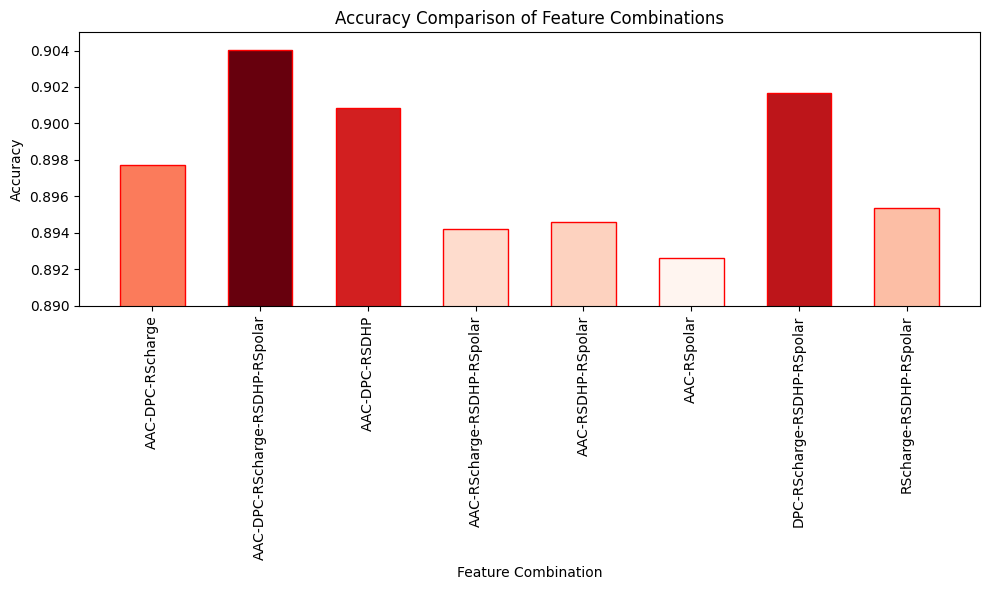

In [47]:


# Data
feature_combos = [x for x in metrics['feature_combo']]
accuracies = [x for x in metrics['accuracy']]

# Normalize accuracies to [0, 1] for colormap
norm = plt.Normalize(min(accuracies), max(accuracies))
colors = plt.cm.Reds(norm(accuracies))

# Plotting
plt.figure(figsize=(10, 6))

# Add black border for each bar
bars = plt.bar(feature_combos, accuracies, color=colors, width=0.6, align='center')
for bar in bars:
    bar.set_edgecolor('red')

plt.xlabel('Feature Combination')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Feature Combinations')
plt.xticks(rotation=90)
plt.ylim(0.89, 0.905)  # Set custom y-axis limits
plt.tight_layout()

plt.savefig('feature_combo_accuracy_plot.png')
plt.show()